# B-S 評價

In [1]:
from scipy.stats import norm
from math import sqrt, exp, log

def BS(X):
    d1 = (log(S / K) + (R + Sigma * Sigma/2) * T) / (Sigma * sqrt(T))
    d2 = d1 - Sigma * sqrt(T)

    if X == 'C':
        return S * norm.cdf(d1) - K * exp(-R * T) * norm.cdf(d2)
    if X == 'P':
        return K * exp(-R * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    
def main():
    global S, T, R, K, Sigma

    S = 100
    K = 100
    Sigma = 0.3
    R = 0.01
    T = 1

    print('The price of Call = %.15f' %BS('C'))
    print('The price of Put  = %.15f' %BS('P'))

main()

The price of Call = 12.368267463784079
The price of Put  = 11.373250838700891


# 二分法解函數

In [2]:
def f(x):
    return pow(x, 2) - 2

def solve():
    a = 1
    b = 2

    while True:
        c = (b + a)/ 2
        
        if b - c < pow(10, -6):
            break

        if f(b) * f(c) < 0:
            a = c
        else:
            b = c
    return c

def main():
    print('函數求解 %.6f' %solve())

main()

函數求解 1.414214


#   二分法解BS model 隱含波動率

In [3]:
def BS(X, Sigma):
    d1 = (log(S / K) + (R + Sigma * Sigma/2) * T) / (Sigma * sqrt(T))
    d2 = d1 - Sigma * sqrt(T)

    if X == 'C':
        return S * norm.cdf(d1) - K * exp(-R * T) * norm.cdf(d2) - Price_C
    if X == 'P':
        return K * exp(-R * T) * norm.cdf(-d2) - S * norm.cdf(-d1) - Price_P
    
def solve(X):
    a = 0.00001
    b = 1.00001

    while True:
        c = (b + a)/ 2
        
        if b - c < pow(10, -15):
            break

        if BS(X, b) * BS(X, c) < 0:
            a = c
        else:
            b = c
    return c

def main():
    global S, T, R, K, Price_C, Price_P

    S = 100
    K = 100
    # Sigma = 0.3
    R = 0.01
    T = 1

    Price_C = 12.368267463784079
    Price_P = 11.373250838700891

    print('IV of Call = %.15f' %solve('C'))
    print('IV of Put  = %.15f' % solve('P'))

main()

IV of Call = 0.300000000000000
IV of Put  = 0.300000000000000


# Iris MLP 教學

In [25]:
#!/usr/bin/env python
# -*- coding=utf-8 -*-
__author__ = "柯博文老師 Powen Ko, www.powenko.com"

from sklearn import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd

path = '/Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/FIN 52750 金融數據分析 MLP 教學/iris.csv'
D = pd.read_csv(path, encoding = 'cp1252', low_memory = False)
columns = ['SL', 'SW', 'PL', 'PW']
category=3
dim=4
x_train , x_test , y_train , y_test = train_test_split(D[columns], D['Target'], test_size = 0.2)
y_train2=tf.keras.utils.to_categorical(y_train, num_classes=(category))
y_test2=tf.keras.utils.to_categorical(y_test, num_classes=(category))

# 建立模型
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=10,
    activation=tf.nn.relu,
    input_dim=dim))
model.add(tf.keras.layers.Dense(units=10,
    activation=tf.nn.relu ))
model.add(tf.keras.layers.Dense(units=category,
    activation=tf.nn.softmax ))
model.compile(optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy'])

history = model.fit(x_train, y_train2,
          epochs=250,
          batch_size=16)

#測試
score = model.evaluate(x_test, y_test2, batch_size=16)
print("score:",score)

/Users/xinc./Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.3856 - loss: 0.9467
Epoch 2/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.4038 - loss: 0.9068
Epoch 3/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.5303 - loss: 0.8967
Epoch 4/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.6633 - loss: 0.8913
Epoch 5/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 0.6845 - loss: 0.8545
Epoch 6/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.6889 - loss: 0.8406
Epoch 7/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.6628 - loss: 0.8179
Epoch 8/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step - accuracy: 0.7137 - loss: 0.8057
Epoch 9/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.6685 - loss: 0.7842
Epoch 10/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.6570 - loss: 0.7644
Epoch 11/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 395us/step - accuracy: 0.6931 - loss: 0.7454
Epoch 12/250
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy:

In [26]:
predict = model.predict(x_test)

predict2 = np.argmax(predict, axis=1)
test2 = np.argmax(y_test2, axis=1)

correct_count = 0
Iris = pd.DataFrame(columns=['預測', '答案'])
Iris.index.name = '編號'

for i in range(len(test2)):
    print('%5d\t%5d\t%5d' % (i, predict2[i], test2[i]))
    Iris.loc[i] = [predict2[i], test2[i]]
    if predict2[i] == test2[i]:
        correct_count += 1

accuracy = correct_count / len(test2)
print('準確率 = %.6f' % accuracy)
Iris

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
    0	    0	    0
    1	    2	    2
    2	    2	    2
    3	    1	    1
    4	    0	    0
    5	    0	    0
    6	    0	    0
    7	    2	    2
    8	    2	    2
    9	    1	    1
   10	    1	    1
   11	    1	    1
   12	    1	    1
   13	    2	    2
   14	    2	    2
   15	    1	    1
   16	    0	    0
   17	    1	    1
   18	    0	    0
   19	    2	    2
   20	    2	    2
   21	    2	    2
   22	    1	    1
   23	    0	    0
   24	    1	    1
   25	    0	    0
   26	    2	    2
   27	    0	    0
   28	    0	    0
   29	    2	    2
準確率 = 1.000000


,預測,答案
編號,,
0,0,0
1,2,2
2,2,2
3,1,1
4,0,0
5,0,0
6,0,0
7,2,2
8,2,2


dict_keys(['accuracy', 'loss'])


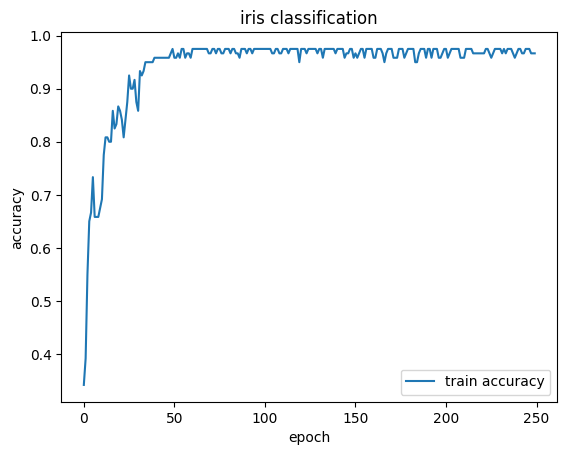

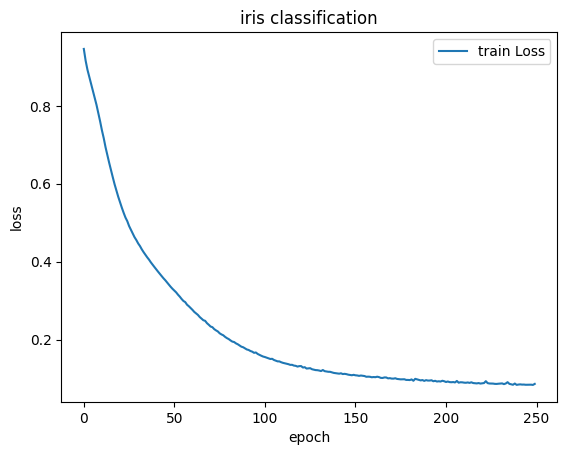

In [27]:
import matplotlib.pyplot as plt
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.title('iris classification')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy'], loc = 'lower right')
plt.show()

plt.plot(history.history['loss'])
plt.title('iris classification')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train Loss'], loc = 'upper right')
plt.show()

In [39]:
columns = ['IV_C0', 'Std_C0', 'IV_P0', 'Std_P0',
           'IV_C1', 'Std_C1', 'IV_P1', 'Std_P1',
           'IV_C2', 'Std_C2', 'IV_P2', 'Std_P2',
           'IV_C3', 'Std_C3', 'IV_P3', 'Std_P3', 'Target']

D = pd.read_excel("/Users/xinc./Documents/GitHub/desktop-tutorial/ndhu/FIN 52750 金融數據分析 MLP 教學/FIN_52750 ImplyVolatility practice.xlsx", usecols=columns)

for i in range(2):
    x_train,x_test,y_train,y_test=train_test_split(D[columns[0:16]], D['Target'], test_size = 0.2)
    print(f'第{i + 1}次訓練')

    category = 2
    dim = 16
    y_train2 = tf.keras.utils.to_categorical(y_train, num_classes=(category))
    y_test2 = tf.keras.utils.to_categorical(y_test, num_classes=(category))

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(units=40, activation=tf.nn.relu, input_dim=dim))
    model.add(tf.keras.layers.Dense(units=40, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(units=category, activation=tf.nn.softmax))
    model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

    history = model.fit(x_train, y_train2, epochs = 2500, batch_size = 100, verbose = 0)

    score = model.evaluate(x_test, y_test2, batch_size=len(y_test))
    print("第 %d 次訓練：準確度：%.16f" %(i + 1, score[1]))

第1次訓練


/Users/xinc./Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5102 - loss: 2.8515
第 1 次訓練：準確度：0.5102040767669678
第2次訓練


/Users/xinc./Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.4082 - loss: 2.8947
第 2 次訓練：準確度：0.4081632792949677
